<a href="https://colab.research.google.com/github/zavesone/NLR_schizophrenia_research_metaanalysis/blob/main/NRL_schizo_meta_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

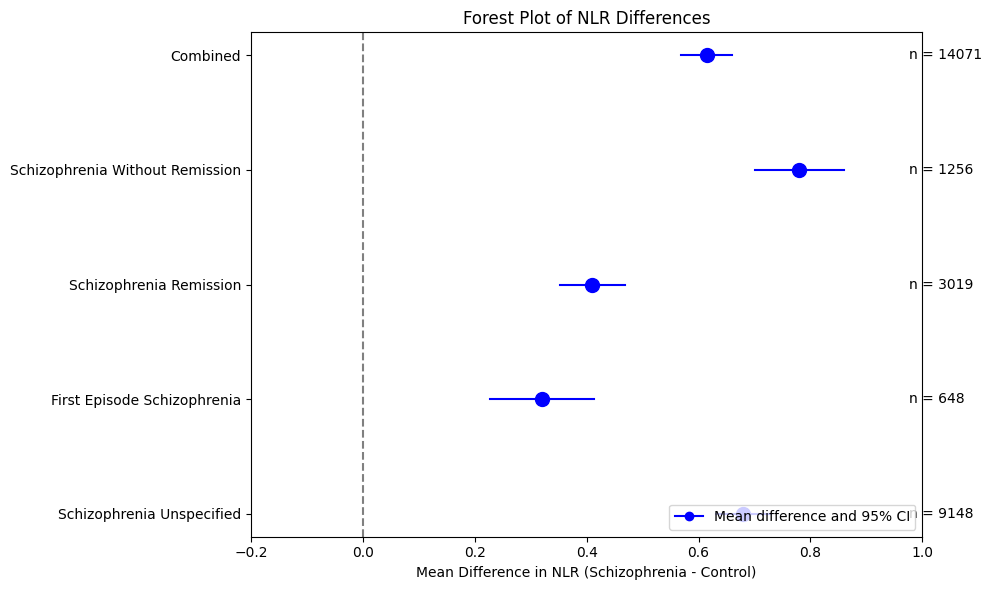

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
groups = ['Schizophrenia Unspecified', 'First Episode Schizophrenia',
          'Schizophrenia Remission', 'Schizophrenia Without Remission', 'Combined']
means = [2.3, 1.94, 2.03, 2.4, 2.2344]
control_mean = 1.62
differences = [mean - control_mean for mean in means]
sample_sizes = [9148, 648, 3019, 1256, 14071]

# Calculate standard errors
se = [np.sqrt((1.4**2 / 9148) + (0.7**2 / 1150)),
      np.sqrt((1.09**2 / 648) + (0.7**2 / 1150)),
      np.sqrt((1.17**2 / 3019) + (0.7**2 / 1150)),
      np.sqrt((1.23**2 / 1256) + (0.7**2 / 1150)),
      0.0235]  # Combined SE calculated earlier

# Calculate confidence intervals
ci_lower = [diff - 1.96 * se_i for diff, se_i in zip(differences, se)]
ci_upper = [diff + 1.96 * se_i for diff, se_i in zip(differences, se)]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot data points and lines
for i, (diff, lower, upper) in enumerate(zip(differences, ci_lower, ci_upper)):
    ax.plot([lower, upper], [i, i], 'b-')
    ax.plot(diff, i, 'bo', markersize=10)

# Customize the plot
ax.set_yticks(range(len(groups)))
ax.set_yticklabels(groups)
ax.set_xlabel('Mean Difference in NLR (Schizophrenia - Control)')
ax.set_title('Forest Plot of NLR Differences')

# Add a vertical line at x=0
ax.axvline(x=0, color='gray', linestyle='--')

# Add text for sample sizes
for i, n in enumerate(sample_sizes):
    ax.text(0.98, i, f'n = {n}', verticalalignment='center', transform=ax.get_yaxis_transform())

# Set x-axis limits
ax.set_xlim(-0.2, 1.0)

# Add legend
ax.plot([], [], 'bo-', label='Mean difference and 95% CI')
ax.legend(loc='lower right')

plt.tight_layout()
plt.savefig('forest_plot.png')
plt.show()